# HIPCA

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
data = 'hipca1.xlsx'

xls = pd.ExcelFile(data)
print(xls.sheet_names)

['Discovery dataset', 'Validation dataset', 'Test dataset']


# Discovery dataset - hipca_train

In [21]:
hipca_train_df = pd.read_excel(data, sheet_name='Discovery dataset',header=None)

In [22]:
hipca_train_df = hipca_train_df.T

In [23]:
hipca_train_df

,0,1,2,3,4,5,6,7,8,9,...,337,338,339,340,341,342,343,344,345,346
0,study,study,Study No. (From VG sheet (V-*) from SB sheet (...,Title of Paper,Author (year),Journal,Study Accession,Sample Accession or Sample ID,Sample title (ENA/SRA),Sample title (Paper),...,s__Subdoligranulum_variabile,s__Succinatimonas_hippei,s__Sutterella_wadsworthensis,s__Turicibacter_sanguinis,s__Varibaculum_cambriense,s__Veillonella_atypica,s__Veillonella_dispar,s__Veillonella_parvula,s__Weissella_cibaria,s__Weissella_confusa
1,V-2_ACVD,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142287,ZSL-004,ZSL-004,...,0.000502,0,0.031374,0,0,0.003428,0.001997,0.134307,0.337587,0.120542
2,V-2_ACVD,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142288,ZSL-007,ZSL-007,...,0.003549,0,0,0,0,4.502121,0.122268,1.75344,0,0
3,V-2_ACVD,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142293,ZSL-010,ZSL-010,...,0,0,0,0,0,0,0,0.004011,0,0
4,V-2_ACVD,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142291,ZSL-011,ZSL-011,...,0,0,0,0,0,0.001396,0.001766,0.145084,0,0.000595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4343,S-7_Underweight,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431948,SZAXPI029564-74,SZAXPI029564-74,...,0,0,0.16279,0,0,0.032285,0.058717,0.10368,0,0
4344,S-7_Underweight,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431949,SZAXPI029565-77,SZAXPI029565-77,...,0,0,0,0,0,0,0.001255,0.312764,0,0
4345,S-7_Underweight,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431951,SZAXPI029567-80,SZAXPI029567-80,...,0.001159,0,0,0,0,0.08658,0.036647,0.082732,0,0
4346,S-7_Underweight,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431964,SZAXPI029580-98,SZAXPI029580-98,...,0,0,0,0,0,0,0,0.00855,0,0


In [24]:
hipca_train_df.reset_index(drop=True, inplace=True)
hipca_train_df.columns = hipca_train_df.iloc[0]
hipca_train_df = hipca_train_df.iloc[1:].reset_index(drop=True)

In [25]:
hipca_train_country = hipca_train_df['Country'].unique()
hipca_train_country

array(['China', 'Austria', 'France', 'Germany', 'USA', 'Spain',
       'Tanzania', 'Italian', 'Sweden', 'Italy', 'Denmark', 'Peru',
       'Korea', 'Netherlands', 'Israel', 'Japan', 'Canada',
       'Mongolia and 聽Inner Mongolia', 'Iceland', 'Former Yugoslavia',
       'Norway', 'Hungary', 'Estonia', 'Finland'], dtype=object)

In [26]:
hipca_train_df['Country'].value_counts()

,count
Country,
China,1274
Israel,883
USA,530
Netherlands,467
Denmark,258
Spain,186
France,155
Austria,146
Sweden,145


The dataset shows a relatively good level of geographical diversity, with samples collected from Asia, Europe, North America, South America, and Africa. However, the distribution is clearly not even across continents.
The majority of samples come from Asia (2311 samples), particularly from China and Israel, followed by a significant number from Europe (1447 samples), including countries like the Netherlands, Denmark, Spain, and France.
North America is represented mainly by the USA (530 samples) and Canada (23 samples), totaling 553 samples.
Africa is represented only by Tanzania (20 samples).
South America contributes just 15 samples from Peru.

In [27]:
hipca_train_df['Study Accession'].unique()

array(['PRJEB21528', 'PRJEB7774', 'PRJEB6070', 'PRJEB12449', 'PRJEB10878',
       'PRJEB1220', 'PRJNA385949', 'PRJNA389280', 'PRJEB15371',
       'PRJNA278393', 'PRJNA422434', 'PRJEB1786', 'PRJEB6337',
       'PRJEB12123', 'PRJEB19090', 'PRJNA305507', 'PRJNA268964',
       'PRJEB1690', 'PRJNA319574', 'PRJEB11532', 'PRJEB6997',
       'PRJNA299502', 'PRJDB3601', 'PRJEB8094', 'PRJEB13870', 'PRJEB6456',
       'PRJEB4336', 'PRJNA177201', 'PRJNA373879', 'PRJNA328899',
       'PRJNA48479', 'PRJNA290729', 'PRJEB12947'], dtype=object)

In [28]:
hipca_train_study = hipca_train_df['Study Accession'].dropna().unique().tolist()
hipca_train_study

['PRJEB21528',
 'PRJEB7774',
 'PRJEB6070',
 'PRJEB12449',
 'PRJEB10878',
 'PRJEB1220',
 'PRJNA385949',
 'PRJNA389280',
 'PRJEB15371',
 'PRJNA278393',
 'PRJNA422434',
 'PRJEB1786',
 'PRJEB6337',
 'PRJEB12123',
 'PRJEB19090',
 'PRJNA305507',
 'PRJNA268964',
 'PRJEB1690',
 'PRJNA319574',
 'PRJEB11532',
 'PRJEB6997',
 'PRJNA299502',
 'PRJDB3601',
 'PRJEB8094',
 'PRJEB13870',
 'PRJEB6456',
 'PRJEB4336',
 'PRJNA177201',
 'PRJNA373879',
 'PRJNA328899',
 'PRJNA48479',
 'PRJNA290729',
 'PRJEB12947']

In [29]:
hipca_train_sample = hipca_train_df['Sample Accession or Sample ID'].dropna().unique().tolist()
hipca_train_sample

['SAMEA104142287',
 'SAMEA104142288',
 'SAMEA104142293',
 'SAMEA104142291',
 'SAMEA104142284',
 'SAMEA104142295',
 'SAMEA104142296',
 'SAMEA104142297',
 'SAMEA104142298',
 'SAMEA104142285',
 'SAMEA104142299',
 'SAMEA104142300',
 'SAMEA104142301',
 'SAMEA104142302',
 'SAMEA104142290',
 'SAMEA104142308',
 'SAMEA104142307',
 'SAMEA104142292',
 'SAMEA104142283',
 'SAMEA104142289',
 'SAMEA104142303',
 'SAMEA104142278',
 'SAMEA104142277',
 'SAMEA104142276',
 'SAMEA104142275',
 'SAMEA104142274',
 'SAMEA104142273',
 'SAMEA104142272',
 'SAMEA104142271',
 'SAMEA104142270',
 'SAMEA104142269',
 'SAMEA104142268',
 'SAMEA104142267',
 'SAMEA104142266',
 'SAMEA104142265',
 'SAMEA104142264',
 'SAMEA104142263',
 'SAMEA104142262',
 'SAMEA104142261',
 'SAMEA104142260',
 'SAMEA104142259',
 'SAMEA104142258',
 'SAMEA104142257',
 'SAMEA104142256',
 'SAMEA104142254',
 'SAMEA104142253',
 'SAMEA104142252',
 'SAMEA104142250',
 'SAMEA104142249',
 'SAMEA104142248',
 'SAMEA104142315',
 'SAMEA104142322',
 'SAMEA10414

In [30]:
hipca_train_df['Gender'].unique()

array(['M', 'F', nan, 'not recorded', 'female', 'male',
       'Mismatch for Sample ID'], dtype=object)

In [31]:
counts = hipca_train_df['Gender'].value_counts(dropna = False)
counts

,count
Gender,
NaN,2118
M,1017
F,943
male,148
female,107
Mismatch for Sample ID,13
not recorded,1


In [32]:
hipca_train_gender = hipca_train_df['Gender'].map({
    'M': 'Male',
    'male': 'Male',
    'F': 'Female',
    'female': 'Female',
    'not recorded': 'Other',
    'Mismatch for Sample ID': 'Other'
}).value_counts(dropna = False)

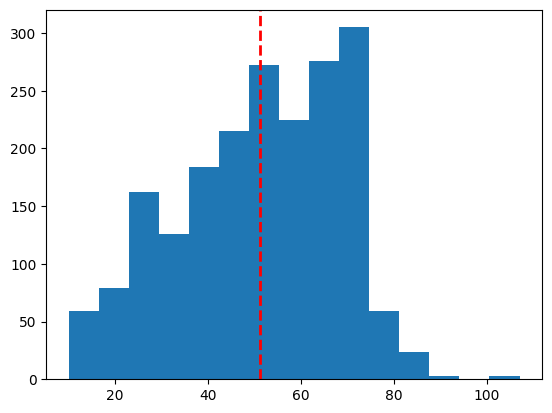

In [33]:
hipca_train_df['Age (Years)'] = pd.to_numeric(hipca_train_df['Age (Years)'], errors='coerce')
plt.hist(hipca_train_df['Age (Years)'].dropna(),bins=15)
mean_value = np.mean(hipca_train_df['Age (Years)'])
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_value:.2f}')

In [34]:
hipca_train_min_age = int(hipca_train_df['Age (Years)'].min())

In [35]:
hipca_train_max_age = int(hipca_train_df['Age (Years)'].max())

In [36]:
hipca_train_mean_age = int(np.mean(hipca_train_df['Age (Years)']))

In [37]:
hipca_train_df['Phenotype'].unique()

array(['ACVD', 'advanced adenoma', 'CRC', 'Crohns disease', 'Healthy',
       'Obesity', 'Overweight', 'Rheumatoid Arthritis',
       'Symptomatic atherosclerosis', 'IGT', 'T2D', 'Ulcerative colitis',
       'Underweight'], dtype=object)

In [38]:
hipca_train_df['Phenotype'].value_counts()

,count
Phenotype,
Healthy,2636
Obesity,342
CRC,257
Overweight,238
T2D,238
ACVD,152
Crohns disease,108
Ulcerative colitis,96
Rheumatoid Arthritis,92


Dataset shows a significant imbalance between healthy and diseased samples:
Healthy samples: 2636
Diseased samples: 1234 (sum of all non-healthy phenotypes combined)

 There are 13 different diseases represented, with sample sizes ranging from 342 (Obesity) to 14 (Symptomatic atherosclerosis).
The distribution of disease cases is fairly natural and balanced, with no single disease dominating at an overwhelming 80-90% level. This indicates a moderate level of diversity among the disease classes.

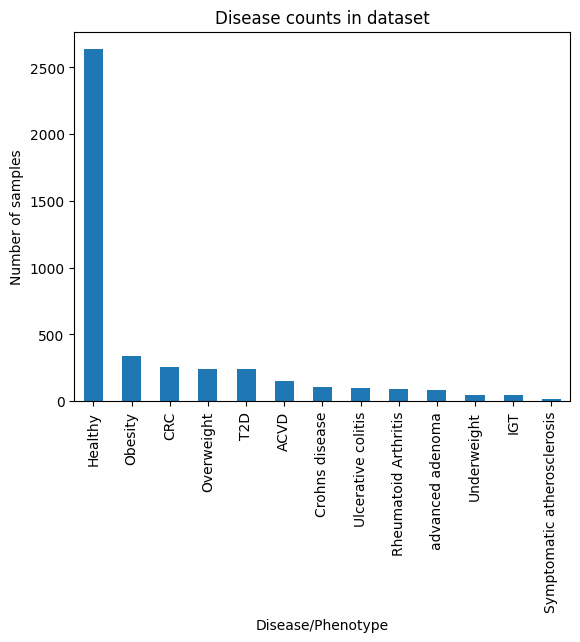

In [39]:
disease_counts = hipca_train_df['Phenotype'].value_counts()
disease_counts.plot(kind='bar')
plt.title('Disease counts in dataset')
plt.xlabel('Disease/Phenotype')
plt.ylabel('Number of samples')
plt.show()

In [40]:
hipca_train_unique_phenotypes = sorted(set(hipca_train_df['Phenotype']))
hipca_train_unique_phenotypes

['ACVD',
 'CRC',
 'Crohns disease',
 'Healthy',
 'IGT',
 'Obesity',
 'Overweight',
 'Rheumatoid Arthritis',
 'Symptomatic atherosclerosis',
 'T2D',
 'Ulcerative colitis',
 'Underweight',
 'advanced adenoma']

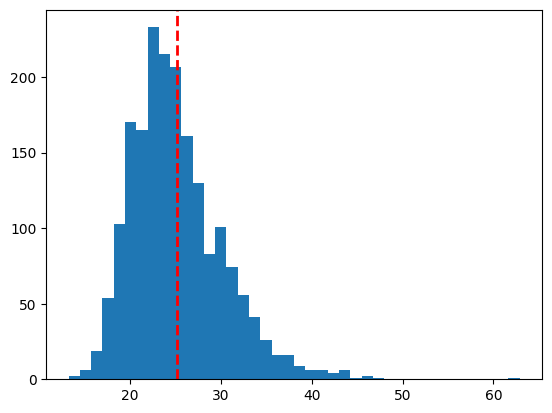

In [41]:
hipca_train_df['BMI (kg/m²)'] = pd.to_numeric(hipca_train_df['BMI (kg/m²)'], errors='coerce')
hipca_train_bmi = hipca_train_df['BMI (kg/m²)']
hipca_train_bmi_mean = np.mean(hipca_train_bmi)
hipca_train_bmi_min = np.min(hipca_train_bmi)
hipca_train_bmi_max = np.max(hipca_train_bmi)
plt.hist(hipca_train_df['BMI (kg/m²)'].dropna(),bins=40)
mean_value = np.mean(hipca_train_df['BMI (kg/m²)'])
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Średnia = {mean_value:.2f}')

# Validation dataset - hipca_val

The metadata are limited - they include only phenotype (disease type), sample accession and country of origin (however available only for 2 cohorts)

In [42]:
hipca_val_df = pd.read_excel(data, sheet_name='Validation dataset',header=None)
hipca_val_df

,0,1,2,3,4,5,6,7,8,9,...,773,774,775,776,777,778,779,780,781,782
0,Sample Accession or Sample ID,SAMEA2582018,SAMEA2582019,SAMEA2582020,SAMEA2582022,SAMEA2582023,SAMEA2582024,SAMEA2582025,SAMEA2582026,SAMEA2582027,...,RHB_RAM_0131,RHB_RAM_0135,RHB_RAM_0136,RHB_RAM_0137,RHB_RAM_0160,RHB_RAM_0163,RHB_RAM_0169,RHB_RAM_0182,RHB_RAM_0198,RHB_RAM_0216
1,Phenotype_all,LC,LC,LC,LC,LC,LC,LC,LC,LC,...,RA,RA,RA,RA,RA,RA,RA,RA,RA,RA
2,Phenotype,Unhealthy,Unhealthy,Unhealthy,Unhealthy,Unhealthy,Unhealthy,Unhealthy,Unhealthy,Unhealthy,...,Unhealthy,Unhealthy,Unhealthy,Unhealthy,Unhealthy,Unhealthy,Unhealthy,Unhealthy,Unhealthy,Unhealthy
3,s__Abiotrophia_defectiva,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,s__Acidaminococcus_fermentans,0,0,0,0,0,0,0,0.013465,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,s__Scardovia_unclassified,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575,s__Streptococcus_sp_BS35b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
576,s__Subdoligranulum_unclassified,0,0,0,0,0,0,0,0,0,...,2.06881,9.22164,22.32754,2.63782,20.1744,0.48739,1.69281,3.74633,1.73043,0.38752
577,s__Turicibacter_unclassified,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
hipca_val_df = hipca_val_df.T
hipca_val_df

,0,1,2,3,4,5,6,7,8,9,...,569,570,571,572,573,574,575,576,577,578
0,Sample Accession or Sample ID,Phenotype_all,Phenotype,s__Abiotrophia_defectiva,s__Acidaminococcus_fermentans,s__Acidaminococcus_intestini,s__Actinomyces_graevenitzii,s__Actinomyces_odontolyticus,s__Actinomyces_oris,s__Actinomyces_turicensis,...,s__Porcine_type_C_oncovirus,s__Pseudomonas_mendocina,s__Pseudomonas_unclassified,s__Roseburia_unclassified,s__Rothia_unclassified,s__Scardovia_unclassified,s__Streptococcus_sp_BS35b,s__Subdoligranulum_unclassified,s__Turicibacter_unclassified,s__Veillonella_unclassified
1,SAMEA2582018,LC,Unhealthy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SAMEA2582019,LC,Unhealthy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SAMEA2582020,LC,Unhealthy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SAMEA2582022,LC,Unhealthy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,RHB_RAM_0163,RA,Unhealthy,0,0,0,0,0,0,0,...,0,0.02142,0.01851,0,0,0,0,0.48739,0,0
779,RHB_RAM_0169,RA,Unhealthy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.69281,0,0.00967
780,RHB_RAM_0182,RA,Unhealthy,0,0,0,0,0,0,0,...,0,0.01816,0.02166,0.02542,0,0,0,3.74633,0,0
781,RHB_RAM_0198,RA,Unhealthy,0,0,0,0,0,0,0,...,0,0,0,0.68937,0,0,0,1.73043,0,0


In [44]:
hipca_val_df.columns = hipca_val_df.iloc[0]

In [45]:
hipca_val_df = hipca_val_df.iloc[1:]

In [46]:
hipca_val_sample = hipca_val_df['Sample Accession or Sample ID'].dropna().unique().tolist()
hipca_val_sample

['SAMEA2582018',
 'SAMEA2582019',
 'SAMEA2582020',
 'SAMEA2582022',
 'SAMEA2582023',
 'SAMEA2582024',
 'SAMEA2582025',
 'SAMEA2582026',
 'SAMEA2582027',
 'SAMEA2582028',
 'SAMEA2582029',
 'SAMEA2582030',
 'SAMEA2582031',
 'SAMEA2582032',
 'SAMEA2582033',
 'SAMEA2582034',
 'SAMEA2582035',
 'SAMEA2582036',
 'SAMEA2582037',
 'SAMEA2582038',
 'SAMEA2582039',
 'SAMEA2582040',
 'SAMEA2582042',
 'SAMEA2582043',
 'SAMEA2582044',
 'SAMEA2582045',
 'SAMEA2582046',
 'SAMEA2582047',
 'SAMEA2582048',
 'SAMEA2582049',
 'SAMEA2582050',
 'SAMEA2582051',
 'SAMEA2582052',
 'SAMEA2582053',
 'SAMEA2582054',
 'SAMEA2582055',
 'SAMEA2582056',
 'SAMEA2582057',
 'SAMEA2582058',
 'SAMEA2582059',
 'SAMEA2582060',
 'SAMEA2582061',
 'SAMEA2582062',
 'SAMEA2582063',
 'SAMEA2582064',
 'SAMEA2582065',
 'SAMEA2582066',
 'SAMEA2582067',
 'SAMEA2582068',
 'SAMEA2582069',
 'SAMEA2582070',
 'SAMEA2582071',
 'SAMEA2582072',
 'SAMEA2582073',
 'SAMEA2582074',
 'SAMEA2582075',
 'SAMEA2582076',
 'SAMEA2582077',
 'SAMEA2582078

In [47]:
hipca_val_phenotype = hipca_val_df['Phenotype_all'].dropna().unique().tolist()
hipca_val_phenotype

['LC',
 'Healthy_P',
 'CD',
 'AS (N-5)',
 'NAFLD (N-4)',
 'CRC (N-7: Japan)',
 'OW (N-7)',
 'UW (N-7)',
 'OB (N-8)',
 'OW (N-8)',
 'Healthy (N-8)',
 'CRC (N-8)',
 'UW (N-8)',
 'Healthy (N-1)',
 'OW (N-1)',
 'OB (N-1)',
 'UW (N-1)',
 'CRC (N-7: Italy)',
 'Colorectal Adenoma (N-7)',
 'OB (N-7)',
 'RA']

In [48]:
import re

def cleaned(string):
  pattern = r'\s*\(.*?\)'
  repl = ''
  return re.sub(pattern, repl, string)

hipca_val_phenotype = [cleaned(item) for item in hipca_val_phenotype]

hipca_val_phenotype = set(hipca_val_phenotype)
hipca_val_phenotype

{'AS',
 'CD',
 'CRC',
 'Colorectal Adenoma',
 'Healthy',
 'Healthy_P',
 'LC',
 'NAFLD',
 'OB',
 'OW',
 'RA',
 'UW'}

diseases:
- AS -> Ankylosing Spondylitis
- CD -> Crohn's Disease
- CRC -> Colorectal Cancer
- Colorectal Adenoma
- LC -> Liver Cirrhosis
- NAFLD -> Non-Alcoholic Fatty Liver Disease
- OB -> Obese
- OW -> Overweight
- RA -> Rheumatoid Arthritis
- UW -> Underweight

In [49]:
hipca_val_country = ["Japan","Italy"]

# Test dataset - hipca_test

In [50]:
hipca_test = pd.read_excel(data, sheet_name='Test dataset',header=None)

In [51]:
hipca_test = hipca_test.T
hipca_test

,0,1,2,3,4,5,6,7,8,9,...,542,543,544,545,546,547,548,549,550,551
0,Title_of_Paper,Author,study_accession,sample_accession,run_accession,sample_title,Sample_title_papaer,Phenotype,Gender (M/F),Geographical Location,...,s__Propionibacterium_phage_P14_4,s__Salmonella_phage_Vi_II_E1,s__Staphylococcus_phage_80alpha,s__Staphylococcus_phage_PVL,s__Klebsiella_phage_KP36,s__Enterobacteria_phage_If1,s__Enterobacteria_phage_M13,s__Enterobacteria_phage_HK542,s__Enterobacteria_phage_HK544,s__Vibrio_phage_pYD38_A
1,Metagenomics analysis reveals features unique ...,KaurK (2020),PRJNA531203,SAMN11418649,SRR9108958,Khargone 1,IND_1,Healthy,M,Indian,...,0,0,0,0,0,0,0,0,0,0
2,Metagenomics analysis reveals features unique ...,KaurK (2020),PRJNA531203,SAMN11418651,SRR9108960,Khargone 3,IND_3,Healthy,M,Indian,...,0,0,0,0,0,0,0,0,0,0
3,Metagenomics analysis reveals features unique ...,KaurK (2020),PRJNA531203,SAMN11418652,SRR9108959,Khargone 4,IND_4,Healthy,M,Indian,...,0,0,0,0,0,0,0,0,0,0
4,Metagenomics analysis reveals features unique ...,KaurK (2020),PRJNA531203,SAMN11418653,SRR9108954,Khargone 5,IND_5,Healthy,M,Indian,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Use of shotgun metagenomics for the identifica...,LokmerA (2020),PRJEB27005,SAMEA4719770,ERR2619717,Cam2013_BAB19,BAB19a,Healthy,M,Cameroon,...,0,0,0,0,0,0,0,0,0,0
602,Use of shotgun metagenomics for the identifica...,LokmerA (2020),PRJEB27005,SAMEA4719771,ERR2619718,Cam2013_BAB20,BAB20a,Healthy,M,Cameroon,...,0,0,0,0,0,0,0,0,0,0
603,Use of shotgun metagenomics for the identifica...,LokmerA (2020),PRJEB27005,SAMEA4719773,ERR2619720,Cam2013_BAB23,BAB23a,Healthy,F,Cameroon,...,0,0,0,0,0,0,0,0,0,0
604,Use of shotgun metagenomics for the identifica...,LokmerA (2020),PRJEB27005,SAMEA4719774,ERR2619721,Cam2013_BAB29,BAB29a,Healthy,F,Cameroon,...,0,0,0,0,1.455953,0,0,0,0,0


In [52]:
hipca_test.reset_index(drop=True, inplace=True)
hipca_test.columns = hipca_test.iloc[0]
hipca_test = hipca_test.iloc[1:].reset_index(drop=True)

In [53]:
hipca_test_country = hipca_test['Geographical Location'].unique()
hipca_test_country

array(['Indian', 'china', 'China', 'TZA', 'GHA', 'Africa', 'Cameroon'],
      dtype=object)

In [54]:
seen = []
unique = []

for item in hipca_test_country:
  country = item.lower()
  if country not in seen:
    unique.append(item)
    seen.append(country)

hipca_test_country = unique
hipca_test_country

['Indian', 'china', 'TZA', 'GHA', 'Africa', 'Cameroon']

In [55]:
hipca_test['Geographical Location'].value_counts()

,count
Geographical Location,
china,292
China,151
TZA,47
Cameroon,40
GHA,28
Africa,24
Indian,23


The majority of the samples originate from China (443 in total), followed by smaller numbers from African countries such as Tanzania, Ghana, and Cameroon. There are also mentions of "Indian", but no clear representation from Europe, the Americas, or Oceania.

In [56]:
hipca_test_study = hipca_test['study_accession'].dropna().unique().tolist()

In [57]:
hipca_test_sample = hipca_test['sample_accession'].dropna().unique().tolist()

In [58]:
hipca_test_gender = hipca_test['Gender (M/F) '].value_counts(dropna = False)
hipca_test_gender

,count
Gender (M/F),
NaN,313
M,175
F,117


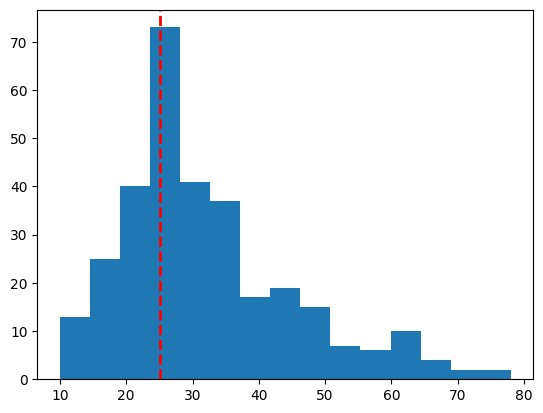

In [59]:
hipca_test['Age (years) '] = pd.to_numeric(hipca_test['Age (years) '], errors='coerce')
plt.hist(hipca_test['Age (years) '].dropna(),bins=15)
hipca_test_age_mean = np.mean(hipca_test['Age (years) '])
hipca_test_age_min = np.min(hipca_test['Age (years) '])
hipca_test_age_max = np.max(hipca_test['Age (years) '])
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Średnia = {mean_value:.2f}')

In [60]:
hipca_test_phenotype = hipca_test['Phenotype'].dropna().unique().tolist()
hipca_test_phenotype

['Healthy', 'ESRD', 'SCZ']

- ESRD - End-Stage Renal Disease
- SCZ -  Schizophrenia




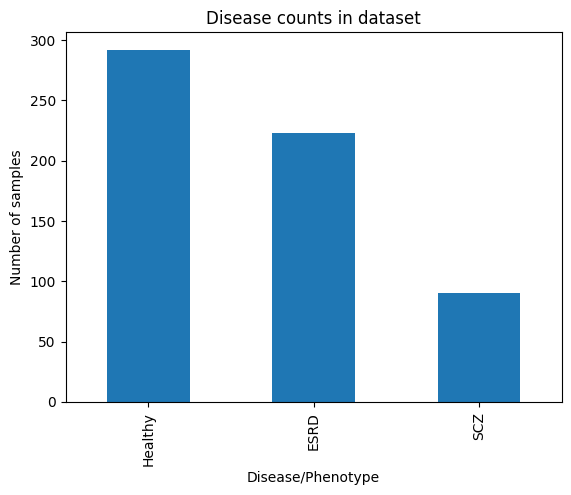

,count
Phenotype,
Healthy,292
ESRD,223
SCZ,90


In [61]:
disease_counts = hipca_test['Phenotype'].value_counts()
disease_counts.plot(kind='bar')
plt.title('Disease counts in dataset')
plt.xlabel('Disease/Phenotype')
plt.ylabel('Number of samples')
plt.show()
disease_counts

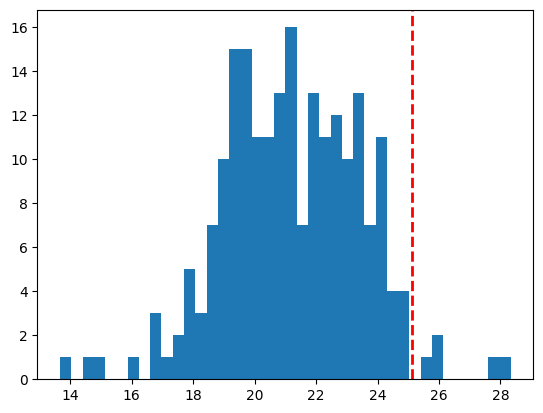

In [62]:
hipca_test['BMI(Kg/m2)'] = pd.to_numeric(hipca_test['BMI(Kg/m2)'], errors='coerce')
hipca_test_bmi = hipca_test['BMI(Kg/m2)']
plt.hist(hipca_test['BMI(Kg/m2)'].dropna(),bins=40)
hipca_test_bmi_mean = np.mean(hipca_test['BMI(Kg/m2)'])
hipca_test_bmi_min = np.min(hipca_test['BMI(Kg/m2)'])
hipca_test_bmi_max = np.max(hipca_test['BMI(Kg/m2)'])
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'mean = {mean_value:.2f}')

# Comparison of these three datasets


In [63]:
common_samples_train_val = set(hipca_train_sample) & set(hipca_val_sample)
len(common_samples_train_val)

0

In [64]:
common_samples_train_test = set(hipca_train_sample) & set(hipca_test_sample)
len(common_samples_train_test)

0

In [65]:
common_samples_val_test = set(hipca_val_sample) & set(hipca_test_sample)
len(common_samples_val_test)

0

 test dataset was independent.

## gender

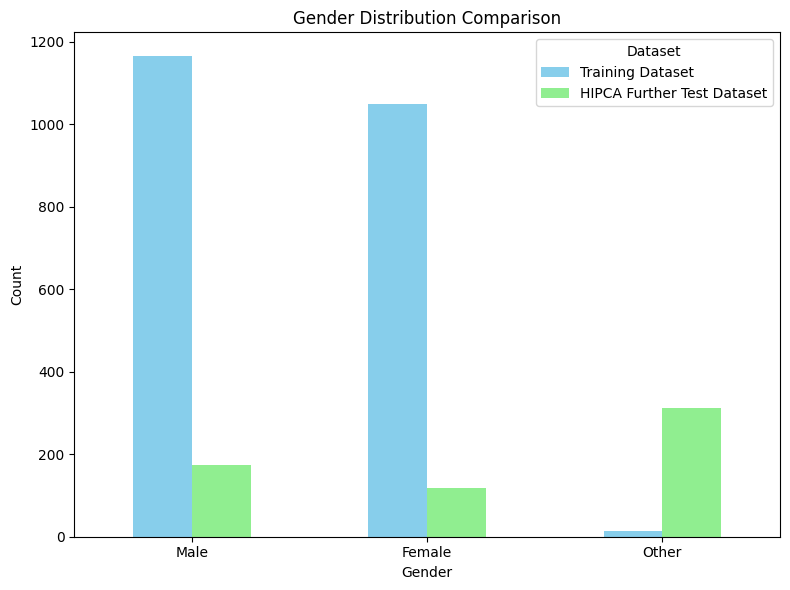

In [66]:

hipca_train_gender = hipca_train_df['Gender'].map({
    'M': 'Male',
    'male': 'Male',
    'F': 'Female',
    'female': 'Female',
    'not recorded': 'Other',
    'Mismatch for Sample ID': 'Other'
}).value_counts(dropna=False)

hipca_test_gender = hipca_test['Gender (M/F) '].fillna('Unknown').map({
    'M': 'Male',
    'F': 'Female',
    'Unknown': 'Other'
}).value_counts(dropna=False)


hipca_train_gender = hipca_train_gender.reindex(['Male', 'Female', 'Other'], fill_value=0)
hipca_test_gender = hipca_test_gender.reindex(['Male', 'Female', 'Other'], fill_value=0)


df_combined = pd.DataFrame({
    'Training Dataset': hipca_train_gender,
    'HIPCA Further Test Dataset': hipca_test_gender
})


ax = df_combined.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightgreen'])

plt.title('Gender Distribution Comparison')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

## age

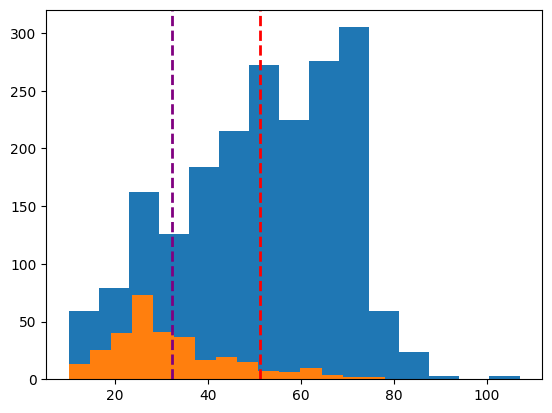

In [67]:
hipca_train_df['Age (Years)'] = pd.to_numeric(hipca_train_df['Age (Years)'], errors='coerce')
plt.hist(hipca_train_df['Age (Years)'].dropna(),bins=15)
mean_value = np.mean(hipca_train_df['Age (Years)'])
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Średnia = {mean_value:.2f}')

hipca_test['Age (years) '] = pd.to_numeric(hipca_test['Age (years) '], errors='coerce')
plt.hist(hipca_test['Age (years) '].dropna(),bins=15)
mean_value = np.mean(hipca_test['Age (years) '])
plt.axvline(mean_value, color='purple', linestyle='dashed', linewidth=2, label=f'Średnia = {mean_value:.2f}')

The age distributions between the training and validation datasets differ notably. The training dataset consists of an older population, with the age distribution skewed towards older adults. In contrast, the validation dataset has a younger age profile, concentrated around early adulthood to middle age.

## country

In [68]:
hipca_train_country

array(['China', 'Austria', 'France', 'Germany', 'USA', 'Spain',
       'Tanzania', 'Italian', 'Sweden', 'Italy', 'Denmark', 'Peru',
       'Korea', 'Netherlands', 'Israel', 'Japan', 'Canada',
       'Mongolia and 聽Inner Mongolia', 'Iceland', 'Former Yugoslavia',
       'Norway', 'Hungary', 'Estonia', 'Finland'], dtype=object)

In [69]:
hipca_test_country

['Indian', 'china', 'TZA', 'GHA', 'Africa', 'Cameroon']

The training dataset is geographically diverse, covering over 20 countries from multiple continents, whereas the validation dataset is less diverse and primarily focuses on China, African countries, and India.

## disease

Text(0, 0.5, 'Number of samples')

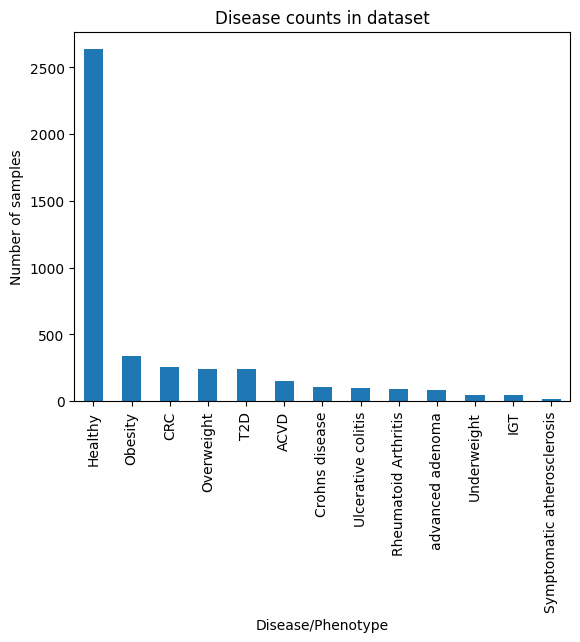

In [70]:
disease_counts = hipca_train_df['Phenotype'].value_counts()
disease_counts.plot(kind='bar')
plt.title('Disease counts in dataset')
plt.xlabel('Disease/Phenotype')
plt.ylabel('Number of samples')

None of the diseases in discovery detaset is equivalent to ERSD or SCZ, but some are closely related as causes, consequences, or comorbidities.

Text(0, 0.5, 'Number of samples')

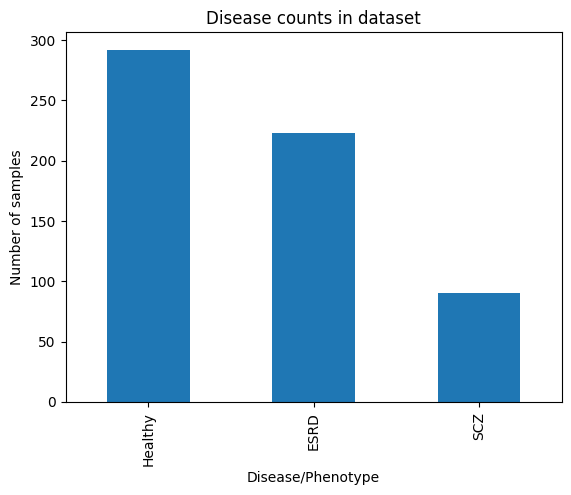

In [71]:
disease_counts = hipca_test['Phenotype'].value_counts()
disease_counts.plot(kind='bar')
plt.title('Disease counts in dataset')
plt.xlabel('Disease/Phenotype')
plt.ylabel('Number of samples')

## BMI

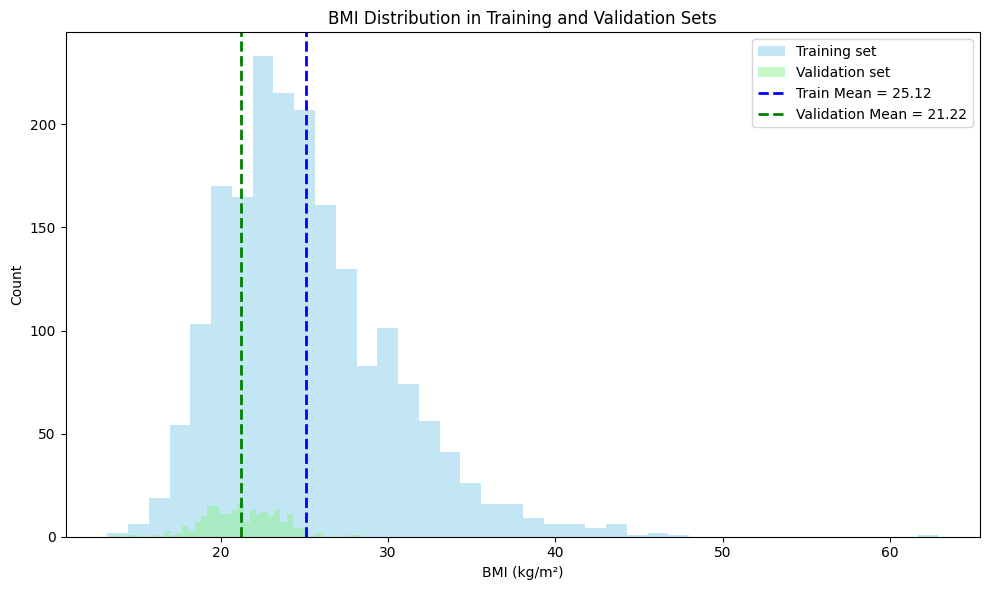

In [72]:
import matplotlib.pyplot as plt
import numpy as np


hipca_train_df['BMI (kg/m²)'] = pd.to_numeric(hipca_train_df['BMI (kg/m²)'], errors='coerce')
hipca_test['BMI(Kg/m2)'] = pd.to_numeric(hipca_test['BMI(Kg/m2)'], errors='coerce')


bmi_train = hipca_train_df['BMI (kg/m²)'].dropna()
bmi_test = hipca_test['BMI(Kg/m2)'].dropna()


plt.figure(figsize=(10, 6))

plt.hist(bmi_train, bins=40, alpha=0.5, label='Training set', color='skyblue')
plt.hist(bmi_test, bins=40, alpha=0.5, label='Validation set', color='lightgreen')

mean_train = np.mean(bmi_train)
mean_test = np.mean(bmi_test)

plt.axvline(mean_train, color='blue', linestyle='dashed', linewidth=2, label=f'Train Mean = {mean_train:.2f}')
plt.axvline(mean_test, color='green', linestyle='dashed', linewidth=2, label=f'Validation Mean = {mean_test:.2f}')

plt.xlabel('BMI (kg/m²)')
plt.ylabel('Count')
plt.title('BMI Distribution in Training and Validation Sets')
plt.legend()
plt.tight_layout()
plt.show()


# Summary

In [73]:
summary_dict = {
    "Unique Phenotypes": ", ".join(hipca_train_unique_phenotypes),
    "Unique Study Accessions": ", ".join(hipca_train_unique_phenotypes),
    "Min Age": hipca_train_min_age,
    "Max Age": hipca_train_max_age,
    "Mean Age": hipca_train_mean_age,
    "Min BMI": hipca_train_bmi_min,
    "Max BMI": hipca_train_bmi_max,
    "Mean BMI": hipca_train_bmi_mean,
    "Country": hipca_train_country
}

summary_df = pd.DataFrame([summary_dict])

summary_df.to_csv("hipca_train_summary.csv", index=False)

In [74]:
summary_dict = {
    "Unique Phenotypes": ", ".join(hipca_val_phenotype),
    "Unique Sample Accessions": ", ".join(hipca_val_sample),
    "Min Age": "Lack of information",
    "Max Age": "Lack of information",
    "Mean Age": "Lack of information",
    "Min BMI": "Lack of information",
    "Max BMI": "Lack of information",
    "Mean BMI": "Lack of information",
    "Country": hipca_val_country
}

summary_df = pd.DataFrame([summary_dict])

summary_df.to_csv("hipca_val_summary.csv", index=False)

In [75]:
summary_dict = {
    "Unique Phenotypes": ", ".join(hipca_test_phenotype),
    "Unique Study Accessions": ", ".join(hipca_test_study),
    "Min Age": hipca_test_age_min,
    "Max Age": hipca_test_age_max,
    "Mean Age": hipca_test_age_mean,
    "Min BMI": hipca_test_bmi_min,
    "Max BMI": hipca_test_bmi_max,
    "Mean BMI": hipca_test_bmi_mean,
    "Country": hipca_test_country
}

summary_df = pd.DataFrame([summary_dict])

summary_df.to_csv("hipca_test_summary.csv", index=False)